# MACHINE LEARNING

### ALGORITMO: KNN

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore')
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

### Trabalhando com o dataset IRIS

![alt text](iris_image.png)

O conjunto de dados das flores íris, é um dataset baseado no conjunto estabelecido pelo estatístico e biólogo Ronald Fisher, onde consiste em observar 4 variáveis discrimantes (o comprimento e a largura das sépalas e pétalas) e através delas determinar qual espécie cada observação pertence.

* Importando dados pela biblioteca seaborn:

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* Observando os dados estatísticos de cada coluna númérica:

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


* Observando os gráficos dos parâmetros das Pétalas:

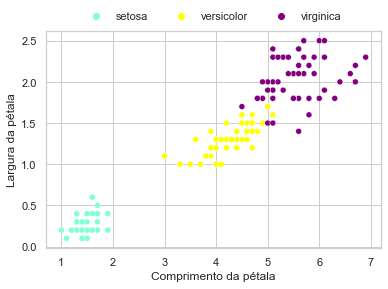

In [91]:
ax = sns.scatterplot(x=iris["petal_length"],y=iris["petal_width"],hue=iris["species"], palette=['aquamarine', 'yellow','purple'])
sns.move_legend(ax,"lower center",
                bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
ax.set(xlabel='Comprimento da pétala', ylabel='Largura da pétala')
plt.show()

* Observando os gráficos dos parâmetros das Sépalas:

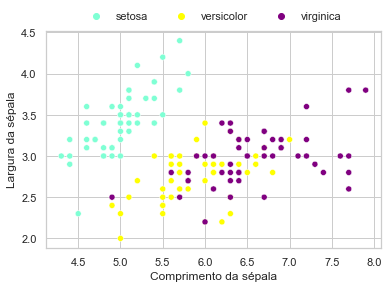

In [93]:
ax = sns.scatterplot(x=iris["sepal_length"],y=iris["sepal_width"],hue=iris["species"], palette=['aquamarine', 'yellow','purple'])
sns.move_legend(ax,"lower center",
                bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
ax.set(xlabel='Comprimento da sépala', ylabel='Largura da sépala')
plt.show()

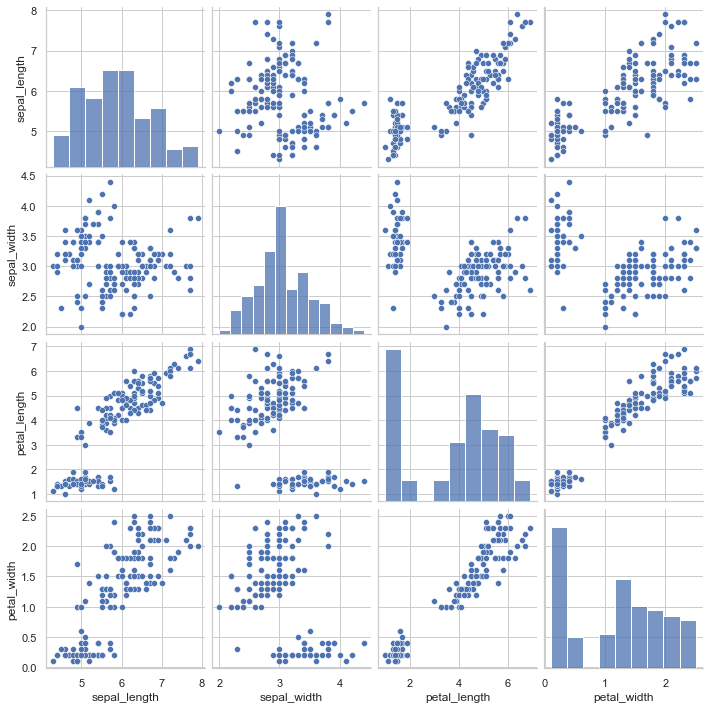

In [94]:
sns.pairplot(iris)

* Realizando a divisão dos dados: 70% dados de treino - 30% dados de teste:

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.drop(["species"],axis=1),
                                                    iris["species"], 
                                                    test_size=0.3)

* Verificação das observações em cada variável atribuida:

In [6]:
X_train.head(2)

,sepal_length,sepal_width,petal_length,petal_width
69,5.6,2.5,3.9,1.1
33,5.5,4.2,1.4,0.2


In [7]:
X_test.head(2)

,sepal_length,sepal_width,petal_length,petal_width
53,5.5,2.3,4.0,1.3
50,7.0,3.2,4.7,1.4


In [8]:
y_train.head(2)

69    versicolor
33        setosa
Name: species, dtype: object

In [9]:
y_test.head(2)

53    versicolor
50    versicolor
Name: species, dtype: object

* Processando o algoritmo:

In [10]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()

* Treinando e imprimindo os resultados do algoritmo:

In [11]:
KNeighborsClassifier.fit(X_train,y_train)

resultado = KNeighborsClassifier.predict(X_test)
resultado

array(['versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

* Testando com novas observações:

In [12]:
data = np.array([[2.5,3.1,4.3,2.9]])
KNeighborsClassifier.predict(data)

array(['versicolor'], dtype=object)

* Conferindo os dados de Teste:

1. Matriz de Confusão:

É uma tabela cruzada que demonstra os erros cometidos e acertos durante a realização do algoritmo.

Por exemplo, na verificação das virgínicas, ele acertou 13 como virgínicas e CONFUNDIU 1 virgínica como versicolor.

In [13]:
print(pd.crosstab(y_test,resultado,rownames=["Original"], colnames=["Predito"],margins=True))

Predito     setosa  versicolor  virginica  All
Original                                      
setosa          14           0          0   14
versicolor       0          12          2   14
virginica        0           2         15   17
All             14          14         17   45


2. Métricas de Classificação:

In [14]:
from sklearn import metrics

In [15]:
print(metrics.classification_report(y_test, resultado, target_names=iris["species"].unique()))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.86      0.86      0.86        14
   virginica       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45

